In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.utils import shuffle

from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import scipy.interpolate

In [2]:
X_train, y_train = pickle.load(open("/Users/Ajit/Documents/_Privat/TU Master/Module/Introduction to Physiological Computing/Neuro-Usability Project/emotional_classifier-master/data/training_data.pkl", "rb"))

In [3]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [4]:
X_train.shape

(62, 36)

In [5]:
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
X_train_2 = X_train[y_train == 2]

In [6]:
Xm0 = X_train_0.mean(0).reshape((4,9))
Xm1 = X_train_1.mean(0).reshape((4,9))
Xm2 = X_train_2.mean(0).reshape((4,9))

In [20]:
def eeg_head_visualize(array, vmin, vmax, title, c=True):

    z = array.reshape((3,3))
    z = np.pad(z,((1,1),(1,1)), 'edge')
    z = z.flatten()
    
    # some parameters
    N = 300             # number of points for interpolation
    xy_center = [2,2]   # center of the plot
    radius = 1.7        # radius

    x = [0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]
    y = [4,4,4,4,4,3,3,3,3,3,2,2,2,2,2,1,1,1,1,1,0,0,0,0,0]

    xi = np.linspace(0, 5, N)
    yi = np.linspace(0, 5, N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    # set points > radius to not-a-number. They will not be plotted.
    # the dr/2 makes the edges a bit smoother
    dr = xi[1] - xi[0]
    for i in range(N):
        for j in range(N):
            r = np.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
            if (r - dr/2) > radius:
                zi[j,i] = "nan"

    # make figure
    fig = plt.figure(figsize=(10,10))

    # set aspect = 1 to make it a circle
    ax = fig.add_subplot(111, aspect = 1)

    # use different number of levels for the fill and the lines
    CS = ax.contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 1, vmin=vmin, vmax=vmax)
    #ax.contour(xi, yi, zi, 15, colors = "grey", zorder = 2)

    # make a color bar
    if c:
        m = plt.cm.ScalarMappable(cmap=plt.cm.jet)
        m.set_array(zi)
        m.set_clim(vmin, vmax)
        cbar = fig.colorbar(m, shrink=0.8)
        cbar.set_label('Power Spectral Density (dB)',size=18, labelpad=20)
        cbar.ax.tick_params(labelsize=15)


    # add the data points
    x_small = [1,2,3,1,2,3,1,2,3]
    y_small = [3,3,3,2,2,2,1,1,1]
    channels = ['F3','FZ','F4', 'C3','CZ','C4', 'P3','PZ','P4']
    ax.scatter(x_small, y_small, marker = 'o', s = 600, zorder = 3, facecolors='white', edgecolors='black', linewidth='2')
    for i, txt in enumerate(channels):
        ax.annotate(txt, (x_small[i], y_small[i]), xytext=(x_small[i]- 0.07, y_small[i]-0.05), fontweight='bold')
    # draw a circle
    # change the linewidth to hide the 
    circle = matplotlib.patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none", linewidth='1')
    ax.add_patch(circle)

    # make the axis invisible 
    for loc, spine in ax.spines.items():
        spine.set_linewidth(0)

    # remove the ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Add some body parts. Hide unwanted parts by setting the zorder low
    # add two ears
    circle = matplotlib.patches.Ellipse(xy = [0.2,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0, linewidth='1')
    ax.add_patch(circle)
    circle = matplotlib.patches.Ellipse(xy = [3.8,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0, linewidth='1')
    ax.add_patch(circle)
    # add a nose
    xy = [[1.5,3], [2,4.2],[2.5,3]]
    polygon = matplotlib.patches.Polygon(xy = xy, facecolor = "w", edgecolor = "k", zorder = 0, linewidth='1')
    ax.add_patch(polygon) 

    # set axes limits
    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 4.5)
    plt.title(title, fontsize=20, fontweight='bold')
    plt.show()
    
    

In [11]:
for i in range(4):
    print(np.max([Xm0[i],Xm1[i],Xm2[i]]))
    print(np.min([Xm0[i],Xm1[i],Xm2[i]]))
    

47.63572783124492
41.09639974513477
40.04980334789067
33.04667614911873
37.526160935959226
27.803926678034486
36.11538095419393
24.20880441163001


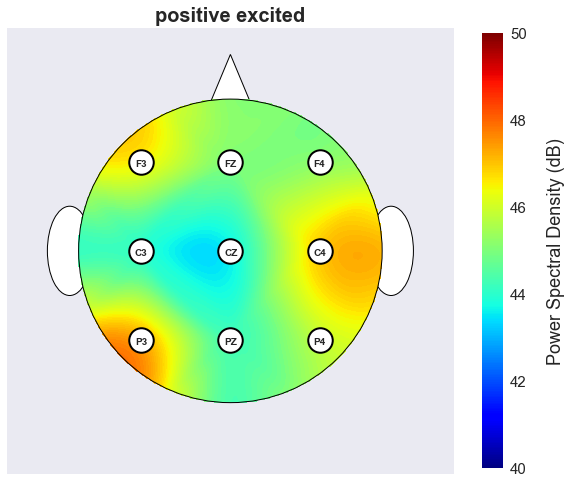

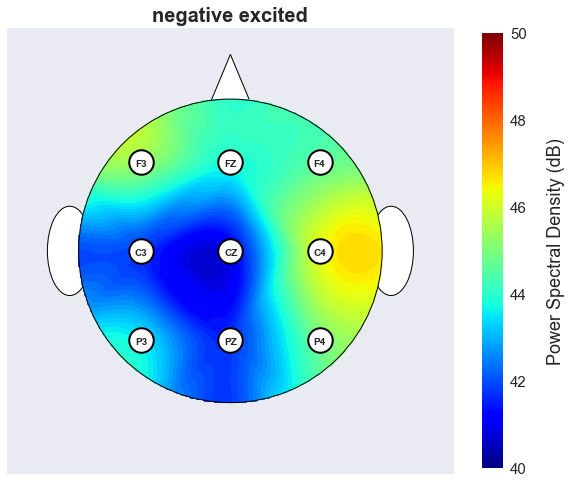

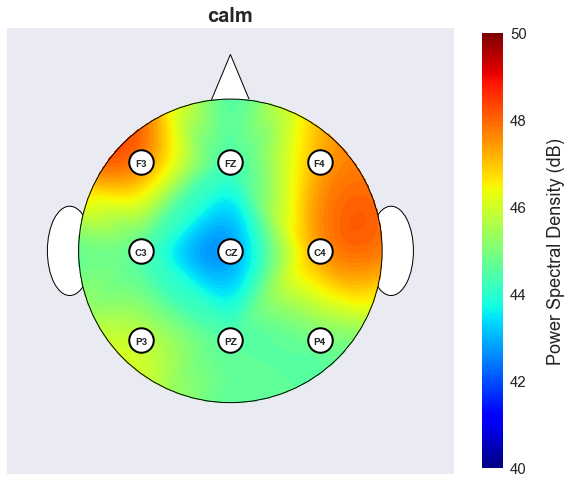

In [26]:
titles = ['positive excited', 'negative excited', 'calm']
# theta
for i, x in enumerate([Xm0,Xm1,Xm2]):
    eeg_head_visualize(x[0],40,50,titles[i])

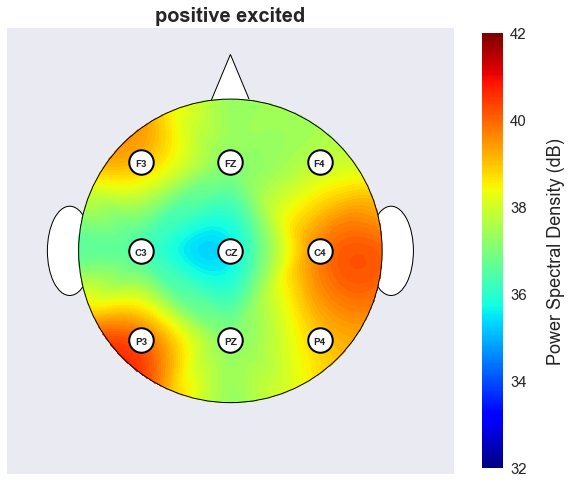

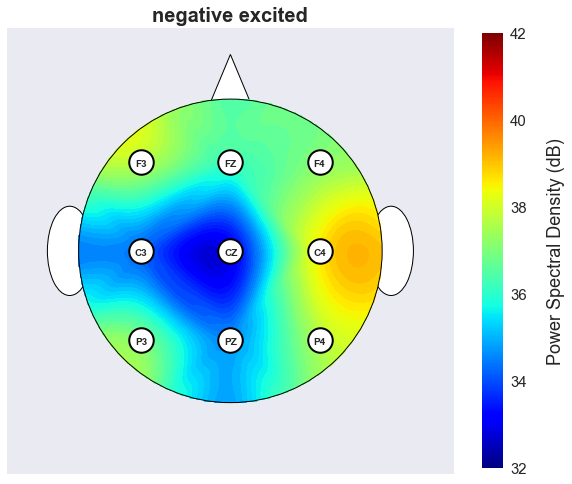

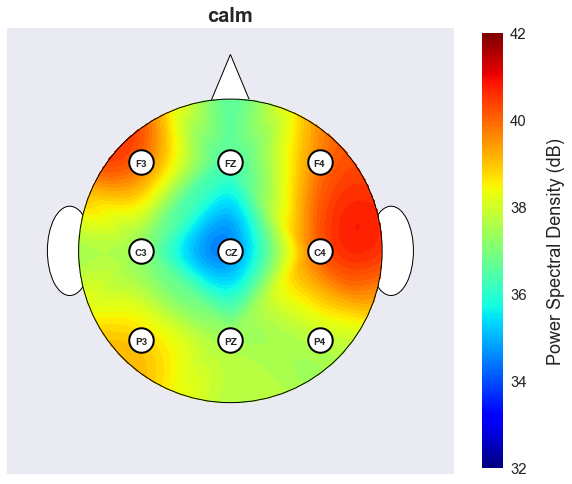

In [27]:
# alpha
for i, x in enumerate([Xm0,Xm1,Xm2]):
    eeg_head_visualize(x[1],32,42,titles[i])

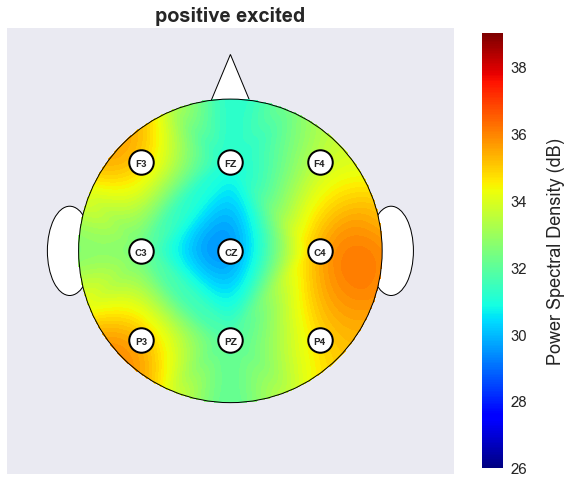

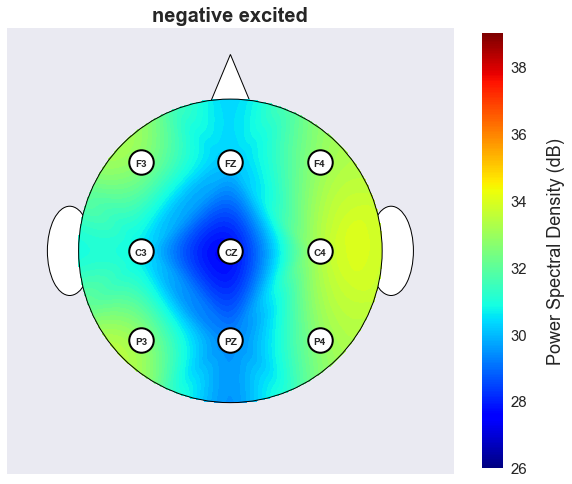

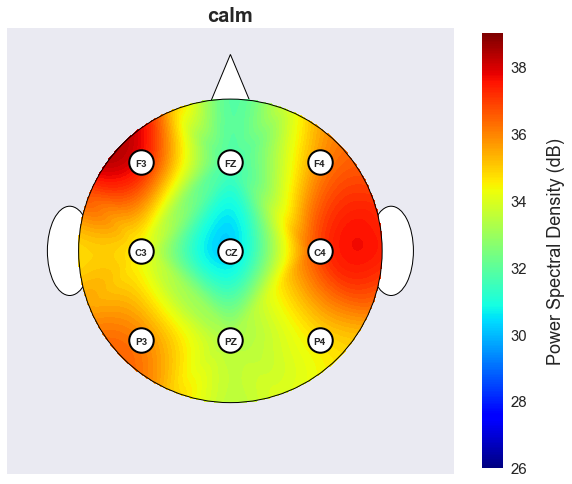

In [29]:
# beta
for i, x in enumerate([Xm0,Xm1,Xm2]):
    eeg_head_visualize(x[2],26,39,titles[i])

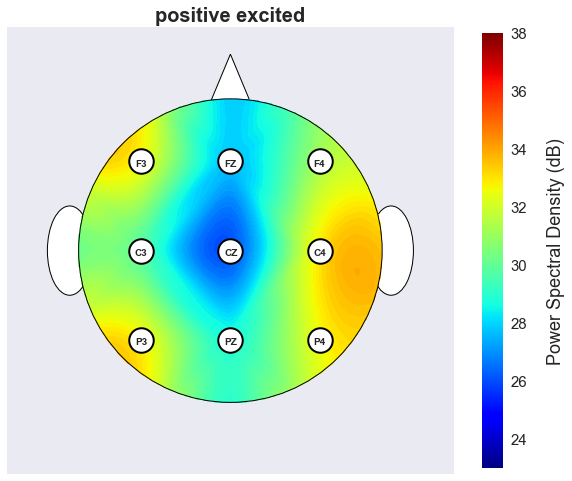

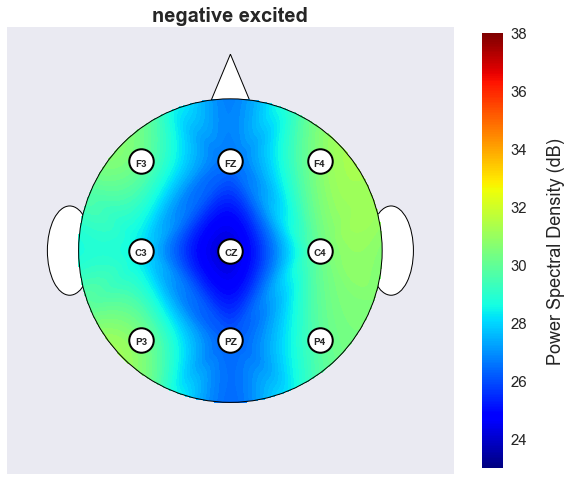

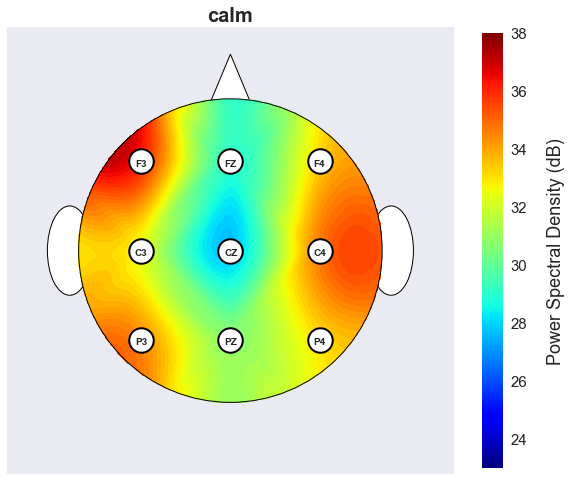

In [30]:
# gamma
for i, x in enumerate([Xm0,Xm1,Xm2]):
    eeg_head_visualize(x[3],23,38,titles[i])